<a href="https://colab.research.google.com/github/bork0047/Data-Analysis/blob/main/TextAnalysis_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Analytics Part 1: Applying Machine Learning To Text Classification


# AIM
To understand how to represent text data for classification and analysis. 

We will use the sentiment analysis application with the movie reviews to explore how to classify reviews into positive and negative sentiment classes. 
Thereafater other tasks will be explored in the follow on lab (supervised and unsupervised NLP analysis).

In [ ]:
import pandas as pd
import numpy as np
import os

import matplotlib.pylab as plt
import seaborn as sns

In [ ]:
# sklearn evaluation stuff
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report

# NLP stuff
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
import nltk
from nltk.stem.porter import PorterStemmer

#export the models from the sklearn library
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# 1.0 Toy Example - Introducing the bag-of-words model

The bag-of-words model is a representation of documents as vectors in a high dimensional vector space based on the training collection vocabulary. Its a way of representing text data when modeling text with machine learning algorithms.

The bag-of-words model is simple to understand and implement and has seen great success in problems such as language modeling and document classification.

It basically assumes an encoding whereby each word in the training dataset vocabulary is considered a feature. 

This means that when handling reviews from the test set we must also consider what happens to words that were not seen in the training set. Two ways to deal with unknown terms observed at test time are to have an unknown token that absorbs all cases of new vocabulary, or more commonly to simply ignore those words in the test collection.

## Transforming documents into feature vectors

CountVectorizer() method converts the text into count vector or a binary vector. For details of the avaiable parameters please refer to scikitLearn [documentation](
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

By calling the fit_transform method on CountVectorizer, we can construct the bag-of-words model and transform text data into sparse feature vectors.


In [ ]:
cv = CountVectorizer() 
docs = np.array([
        'The sun is shining', # doc 0 
        'The weather is sweet', # doc 1 
        'The sun is shining, the weather is sweet, and one and one is two' # doc 2
        ])
bow = cv.fit_transform(docs)

Now let us print the contents of the vocabulary to get a better understanding of the underlying concepts:

In [ ]:
print(cv.vocabulary_) # vocabulary_ attribute of CountVectorizer() shows a mapping of terms to feature indices.

{'the': 6, 'sun': 4, 'is': 1, 'shining': 3, 'weather': 8, 'sweet': 5, 'and': 0, 'one': 2, 'two': 7}


As we can see from executing the preceding command, the vocabulary is stored in a Python dictionary, which maps the unique words that are mapped to integer indices. Next let us print the feature vectors that we just created:

Each index position in the feature vectors shown here corresponds to the integer values that are stored as dictionary items in the CountVectorizer vocabulary. For example, the  first feature at index position 0 resembles the count of the word "and", which only occurs in the last document, and the word is at index position 1 (the 2nd feature in the document vectors) occurs in all three sentences. Those values in the feature vectors are also called the raw term frequencies: *tf (t,d)*—the number of times a term t occurs in a document *d*.

We can print this as follows:

In [ ]:
print(bow) # but this is a sparse matrix


  (0, 6)	1
  (0, 4)	1
  (0, 1)	1
  (0, 3)	1
  (1, 6)	1
  (1, 1)	1
  (1, 8)	1
  (1, 5)	1
  (2, 6)	2
  (2, 4)	1
  (2, 1)	3
  (2, 3)	1
  (2, 8)	1
  (2, 5)	1
  (2, 0)	2
  (2, 2)	2
  (2, 7)	1


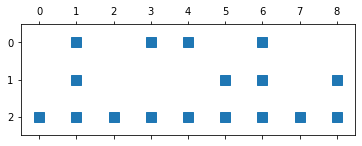

In [ ]:
# printing the sparse matrix

plt.spy(bow)  # can also visualise the sparse BoW matrix with Spy - Plot the sparsity pattern of a 2D array.

### <font color='red'>Exercise</font>: Create a data frame and display the document term matrix. 

Use get_feature_names() on the count vectoriser. 
Use toarray() on the sparse matrix to access the data.
These can be used in a data frame. 

In [ ]:
# Solution here

# print the document term matrix
columns = cv.get_feature_names()
data = bow.toarray()
df = pd.DataFrame(data, columns = columns)
df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,and,is,one,shining,sun,sweet,the,two,weather
0,0,1,0,1,1,0,1,0,0
1,0,1,0,0,0,1,1,0,1
2,2,3,2,1,1,1,2,1,1


### <font color='red'>Exercise</font>: n-grams
Notice that in the above the CountVectorizer we created has frequency counts for unigrams i.e. single words. 
To preserve some of the local ordering information we can also ask it to extract 2-grams of words in addition to the 1-grams (individual words). To do this modify the code using:

CountVectorizer(ngram_range=(1,2)). 

Thereafter view the document term matrix again for comparison.


In [ ]:
# SOLUTION here

cv_2 = CountVectorizer(ngram_range=(1,2))
bow_2 = cv_2.fit_transform(docs)
print(cv_2.vocabulary_)
print(bow_2.toarray())

columns = cv_2.get_feature_names()
data = bow_2.toarray()
df = pd.DataFrame(data, columns = columns)
df

{'the': 15, 'sun': 11, 'is': 2, 'shining': 9, 'the sun': 16, 'sun is': 12, 'is shining': 3, 'weather': 19, 'sweet': 13, 'the weather': 17, 'weather is': 20, 'is sweet': 4, 'and': 0, 'one': 6, 'two': 18, 'shining the': 10, 'sweet and': 14, 'and one': 1, 'one and': 7, 'one is': 8, 'is two': 5}
[[0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1]
 [2 2 3 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,and,and one,is,is shining,is sweet,is two,one,one and,one is,shining,...,sun,sun is,sweet,sweet and,the,the sun,the weather,two,weather,weather is
0,0,0,1,1,0,0,0,0,0,1,...,1,1,0,0,1,1,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,1
2,2,2,3,1,1,1,2,1,1,1,...,1,1,1,1,2,1,1,1,1,1


### <font color='red'>Exercise</font>: How can we plot the word frequency count for the corpus?

{'the': 6, 'sun': 4, 'is': 1, 'shining': 3, 'weather': 8, 'sweet': 5, 'and': 0, 'one': 2, 'two': 7}
dict_keys(['the', 'sun', 'is', 'shining', 'weather', 'sweet', 'and', 'one', 'two']) dict_values([6, 4, 1, 3, 8, 5, 0, 2, 7])


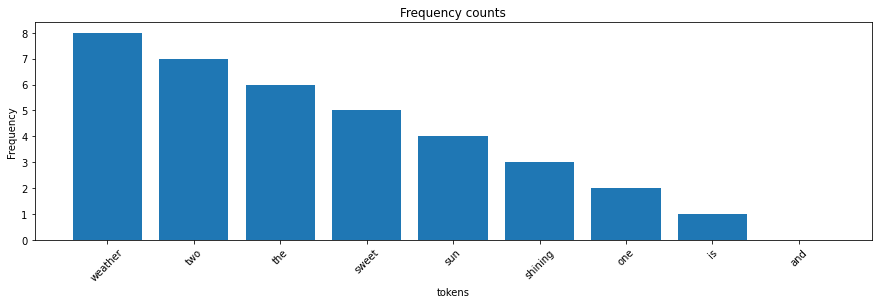

In [ ]:
#SOLUTION here
token_dict = cv.vocabulary_
x = token_dict.keys() # alternative is to use=> cv.get_feature_names();    
y = token_dict.values() # alternative is to use=> bow.toarray().sum(axis=0) 
print(token_dict)
print(x,y)

# Solution needs to be sorted by frequency counts - complete sorting code here ----
# neeed to sort by the frequency count
sorted_pairs = sorted(zip(x, y), key=lambda x: x[1], reverse=True)
x, y = zip(*sorted_pairs)

#plot
plt.figure(figsize=(15,4))
plt.bar(x,y)

plt.ylabel('Frequency')
plt.xlabel('tokens')
plt.title('Frequency counts')
plt.xticks(rotation=45)

plt.show()


### <font color='red'>Exercise</font>: Create a method to plot the frequency distribution

In [ ]:
# SOLUTION: method to print the frequency distribution


def get_frequency_distribution(docs, max_features =None, max_df=1.0, min_df =0):
  cv_ = CountVectorizer(ngram_range=(1,1), max_features =max_features, max_df = max_df, min_df = min_df)
  bag_ = cv_.fit_transform(docs)

  token_dict = cv_.vocabulary_

  tokens = token_dict.keys()# cv_.get_feature_names();    
  tokenCounts = token_dict.values() # bag_.toarray().sum(axis=0)  

  # use zip and sorted to first combine tokens and tokenCounts ; and then sort by the counts
  sorted_pairs = sorted(zip(tokens, tokenCounts), key=lambda x: x[1], reverse=True)

  x, y = zip(*sorted_pairs)
  print(len(x))

  plt.figure(figsize=(15,4))
  
  plt.bar(x,y)

  plt.ylabel('Frequency')
  plt.xlabel('tokens')
  plt.title('Frequency counts')
  plt.xticks(rotation=45)

  plt.show()


9


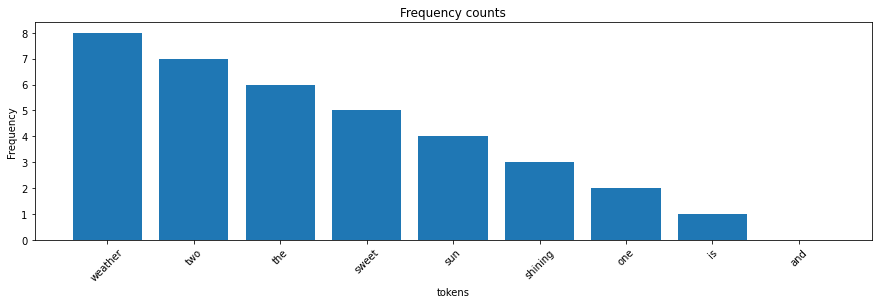

In [ ]:
get_frequency_distribution(docs, 10)

## Understanding word relevancy via term frequency-inverse document frequency

In [ ]:
np.set_printoptions(precision=2) # These options determine the way floating point numbers are displayed.

When we are analyzing text data, we often encounter words that occur across multiple documents from both classes. Those frequently occurring words typically don't contain useful or discriminatory information. 

Term frequency-inverse document frequency (tf-idf) can be used to downweight those frequently occurring words in the feature vectors. 

$$\text{tf-idf}(t,d)=\text{tf (t,d)}\times \text{idf}(t,d)$$

Here the tf(t, d) is the term frequency that we introduced in the previous section,
and the inverse document frequency *idf(t, d)* can be calculated as:

$$\text{idf}(t,d) = \text{log}\frac{N}{\text{df}(d, t) + 1},$$

where $N$ is the total number of documents, and *df(d, t)* is the number of documents *d* that contain the term *t*. 

Note that adding the constant 1 is the default and serves to smooth the counts with assigning a non-zero value to terms to avoid divide by zero errors.

The log is used to ensure that low document frequencies are not given too much weight.

Scikit-learn implements yet another transformer, the `TfidfTransformer`, that takes the raw term frequencies from `CountVectorizer` as input and transforms them into tf-idfs:

In [ ]:
tfidf = TfidfTransformer(use_idf=True, smooth_idf=True)
tfidf_data = tfidf.fit_transform(cv.fit_transform(docs)).toarray()
print(tfidf_data)

columns = cv.get_feature_names()

tfidf_df = pd.DataFrame(tfidf_data, columns = columns)
tfidf_df

[[0.   0.43 0.   0.56 0.56 0.   0.43 0.   0.  ]
 [0.   0.43 0.   0.   0.   0.56 0.43 0.   0.56]
 [0.5  0.45 0.5  0.19 0.19 0.19 0.3  0.25 0.19]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,and,is,one,shining,sun,sweet,the,two,weather
0,0.000000,0.433708,0.000000,0.558478,0.558478,0.000000,0.433708,0.000000,0.000000
1,0.000000,0.433708,0.000000,0.000000,0.000000,0.558478,0.433708,0.000000,0.558478
2,0.502386,0.445076,0.502386,0.191039,0.191039,0.191039,0.296718,0.251193,0.191039


However, if we'd manually calculated the tf-idfs of the individual terms in our feature vectors, we'd have noticed that the `TfidfTransformer` calculates the tf-idfs slightly differently compared to the standard textbook equations that we did in the lecture. The equations for the idf and tf-idf that were implemented in scikit-learn are:

The tf-idf equation that was implemented in scikit-learn is as follows:
$$\text{tf-idf}(t,d) = \text{tf}(t,d) \times (\text{idf}(t,d) \mathbf{+1})$$

$$\text{idf} (t,d) = log\frac{\mathbf{1 \ +} \ n_d}{\mathbf{1 \ +} \ \text{df}(d, t)}$$

The default setting of **smooth_idf=True** acheives the extra addition of one to document frequencies, as if an extra document was seen containing every term in the collection exactly once. Prevents zero divisions.

To make sure that we understand how TfidfTransformer works, let us walk
through an example and calculate the tf-idf of the word **"is"** in the **3rd document**.

The word "is" has a term frequency of 3 (tf = 3) in document 3, and the document frequency of this term is 3 since the term "is" occurs in all three documents (df = 3). Thus, we can calculate the idf as follows:

$$\text{idf}("is", d3) = log \frac{1+3}{1+3} = 0$$

Now in order to calculate the tf-idf, we simply need to add 1 to the inverse document frequency and multiply it by the term frequency:

$$\text{tf-idf}("is",d3)= 3 \times (0+1) = 3$$

In [ ]:
tf_is = 3 # suppose term "is" has a frequency of 3
n_docs = 3

idf_is = np.log((n_docs) / 3)
tfidf_is = tf_is * idf_is
print('tf-idf of term "is" = %.2f' % tfidf_is)

#SOLUTION with smoothed
idf_is = np.log((n_docs+1) / (3+1))
tfidf_is = tf_is * (idf_is + 1)
print('tf-idf of term "is" = %.2f' % tfidf_is)

tf-idf of term "is" = 0.00
tf-idf of term "is" = 3.00


If we repeated these calculations for all terms in the 3rd document, we'd obtain the following tf-idf vectors: [3.39, 3.0, 3.39, 1.29, 1.29, 1.29, 2.0 , 1.69, 1.29]. However, we notice that the values in this feature vector are different from the values that we obtained from the TfidfTransformer that we used previously. 

The next step that we are missing in this tf-idf calculation is the L2-normalization, which can be applied as follows:

$$\text{tfi-df}_{norm} = \frac{[3.39, 3.0, 3.39, 1.29, 1.29, 1.29, 2.0 , 1.69, 1.29]}{\sqrt{[3.39^2+ 3.0^2+ 3.39^2+ 1.29^2+ 1.29^2+ 1.29^2+ 2.0^2+ 1.69^2+ 1.29^2]}}$$

$$=[0.5, 0.45, 0.5, 0.19, 0.19, 0.19, 0.3, 0.25, 0.19]$$

$$\Rightarrow \text{tfi-df}_{norm}("is", d3) = 0.45$$

Lets recalculate the tfidf values by switching off the norm 

In [ ]:
tfidf = TfidfTransformer(use_idf=True, norm=None, smooth_idf=True) # default uses norm=l2
raw_tfidf = tfidf.fit_transform(cv.fit_transform(docs)).toarray()[-1] # consider the last row as an example
raw_tfidf 

array([3.39, 3.  , 3.39, 1.29, 1.29, 1.29, 2.  , 1.69, 1.29])

In [ ]:
# manually add the document length normalisation to the last document
l2_tfidf = raw_tfidf / np.sqrt(np.sum(raw_tfidf**2))
l2_tfidf

array([0.5 , 0.45, 0.5 , 0.19, 0.19, 0.19, 0.3 , 0.25, 0.19])

In [ ]:
# compare above with the norm using 'l2'
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
norm_tfidf = tfidf.fit_transform(cv.fit_transform(docs)).toarray()
norm_tfidf


array([[0.  , 0.43, 0.  , 0.56, 0.56, 0.  , 0.43, 0.  , 0.  ],
       [0.  , 0.43, 0.  , 0.  , 0.  , 0.56, 0.43, 0.  , 0.56],
       [0.5 , 0.45, 0.5 , 0.19, 0.19, 0.19, 0.3 , 0.25, 0.19]])

While it is also more typical to normalize the raw term frequencies before calculating the tf-idfs, the `TfidfTransformer` normalizes the tf-idfs directly.

By default (`norm='l2'`), scikit-learn's TfidfTransformer applies the L2-normalization, which returns a vector of length 1 by dividing an un-normalized feature vector *v* by its L2-norm:

$$v_{\text{norm}} = \frac{v}{||v||_2} = \frac{v}{\sqrt{v_{1}^{2} + v_{2}^{2} + \dots + v_{n}^{2}}} = \frac{v}{\big (\sum_{i=1}^{n} v_{i}^{2}\big)^\frac{1}{2}}$$

### Tfidf Values - Using vectoriser to compute tfidf values


The 3 documents:


1.   'The sun is shining'
2.   'The weather is sweet'
3. 'The sun is shining, the weather is sweet, and one and one is two' 

#### Analysing IDF Values calculated by the TfidfTransformer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


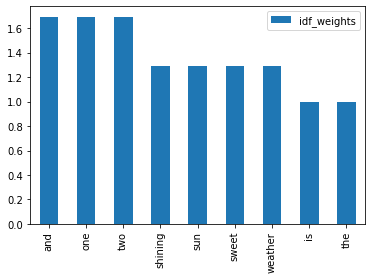

In [ ]:
#instantiate CountVectorizer() 
cv=CountVectorizer() 
 
# generates word counts for the words in your docs 
word_count_vector=cv.fit_transform(docs)

#Now we are going to compute the IDF values by calling
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
tfidf.fit(word_count_vector)

# print idf values by accessing idf_
df_idf = pd.DataFrame(tfidf.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 
 
# sort in descending order and plot the idf values
df_idf.sort_values(by=['idf_weights'], ascending=False).plot.bar()


#### TFIDF in two steps

In [ ]:
# tfidf in two steps i.e. count vectoriser then transform to tfidf

#instantiate CountVectorizer() 
cv=CountVectorizer() 
 
# generates word counts for the words in your docs 
word_count_vector=cv.fit_transform(docs)

#Now we are going to compute the IDF values by calling
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True) #these are all the defaults anyways


print(tfidf.fit_transform(word_count_vector).toarray()) #Transform a count matrix to a normalized tf or tf-idf representation


[[0.   0.43 0.   0.56 0.56 0.   0.43 0.   0.  ]
 [0.   0.43 0.   0.   0.   0.56 0.43 0.   0.56]
 [0.5  0.45 0.5  0.19 0.19 0.19 0.3  0.25 0.19]]


#### TFIDF in one step

In [ ]:
 # Use TfidfVectorizer do it in one step

 #max_df=0.95 means ignore terms that appear in more than 95% of the documents i.e. get rid of corpus specific stopwords
 #min_df = 2 means get rid of words that dont appear in more than 2 documents i.e they are too rare 
 #max_features = 10 means get top 10 features based on count (term frequency across the corpus.)
 tfidf_vec = TfidfVectorizer(use_idf=True, norm='l2', smooth_idf=True)

 tfidf = tfidf_vec.fit_transform(docs)
 print(tfidf)


  (0, 3)	0.5584778353707552
  (0, 1)	0.4337078595086741
  (0, 4)	0.5584778353707552
  (0, 6)	0.4337078595086741
  (1, 5)	0.5584778353707552
  (1, 8)	0.5584778353707552
  (1, 1)	0.4337078595086741
  (1, 6)	0.4337078595086741
  (2, 7)	0.25119322405394995
  (2, 2)	0.5023864481078999
  (2, 0)	0.5023864481078999
  (2, 5)	0.191038921512224
  (2, 8)	0.191038921512224
  (2, 3)	0.191038921512224
  (2, 1)	0.44507629390649395
  (2, 4)	0.191038921512224
  (2, 6)	0.296717529270996


### TfidfVectorizer - sparse matrix versus the dense representation 
Use TfidfVectorizer which is equivalent to CountVectorizer followed by TfidfTransformer.
It converts a collection of raw documents to a matrix of TF-IDF features.


words are: ['and' 'is' 'one' 'shining' 'sun' 'sweet' 'the' 'two' 'weather']
shape is:  (3, 9)
dense representation: 
   (0, 3)	0.5584778353707552
  (0, 1)	0.4337078595086741
  (0, 4)	0.5584778353707552
  (0, 6)	0.4337078595086741


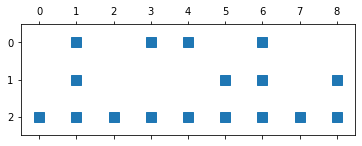

In [ ]:
corpus = np.array([
        'The sun is shining',
        'The weather is sweet',
        'The sun is shining, the weather is sweet, and one and one is two'])

vectorizer = TfidfVectorizer(norm='l2')
X = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names_out()
print("words are:", words)

# get the sparse matrix
# (A Document index , B Specific word-vector index)  TFIDF score for word B in document A
# This is a sparse matrix. It indicates the tfidf score for all non-zero values in the word vector for each document.
print("shape is: ", X.shape)
print("dense representation: \n", X[0])
plt.spy(X)

In [ ]:
# we can reconstruct the sparse representation as a matrix
term_doc_matrix = vectorizer.transform(corpus).toarray()
print(term_doc_matrix)

[[0.   0.43 0.   0.56 0.56 0.   0.43 0.   0.  ]
 [0.   0.43 0.   0.   0.   0.56 0.43 0.   0.56]
 [0.5  0.45 0.5  0.19 0.19 0.19 0.3  0.25 0.19]]


In [ ]:
# Create the pandas DataFrame
df = pd.DataFrame(term_doc_matrix, columns = words)
df.head(5)

,and,is,one,shining,sun,sweet,the,two,weather
0,0.000000,0.433708,0.000000,0.558478,0.558478,0.000000,0.433708,0.000000,0.000000
1,0.000000,0.433708,0.000000,0.000000,0.000000,0.558478,0.433708,0.000000,0.558478
2,0.502386,0.445076,0.502386,0.191039,0.191039,0.191039,0.296718,0.251193,0.191039


As we saw in the previous subsection, the word "is" with the largest term frequency was contained in the 3rd document.

However, after transforming the same feature vector into tf-idfs, we see that the word "is" is
now associated with a relatively smaller tf-idf (0.45) in document 3 since it is
also contained in documents 1 and 2 and thus is unlikely to contain any useful, discriminatory information.

Note how "one" and "shining" are now considered more important even though they occured only once in the previous vector representation (using just TF).

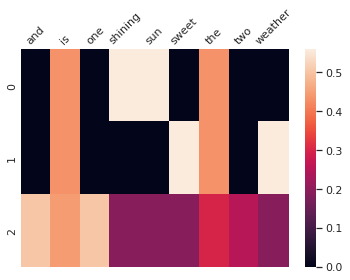

In [ ]:
np.random.seed(0)
import seaborn as sns
sns.set_theme()

ax = sns.heatmap(df)#, vmin=0, vmax=1)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
plt.xticks(rotation=45)
ax.tick_params(length=0) # remove ticks at top
plt.show()


### <font color='red'>Exercise</font>: with TfidfVectorizer
- Again try out the ngram_range=(1, 2, 3) to generate n-grams beyond unigrams with the TFIDFVectorizer.
- max_df and min_df are parameters that can be set with TFIDFVectorizer; where the former specifies the max cutoff for frequent occuring words and latter the minimum expected occurence of words with documents before words are considered. Try setting these and explore the different outputs. 
Please refer to scikitLearn [documentation](
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)


In [ ]:
corpus = np.array([
        'The sun is shining',
        'The weather is sweet',
        'The sun is shining, the weather is sweet, and one and one is two'])

# SOLUTION here
vectorizer_123 = TfidfVectorizer(ngram_range=(1,3))
X_123 = vectorizer_123.fit_transform(corpus)
print(vectorizer_123.get_feature_names())

print("Shape:", X_123.shape)

['and', 'and one', 'and one and', 'and one is', 'is', 'is shining', 'is shining the', 'is sweet', 'is sweet and', 'is two', 'one', 'one and', 'one and one', 'one is', 'one is two', 'shining', 'shining the', 'shining the weather', 'sun', 'sun is', 'sun is shining', 'sweet', 'sweet and', 'sweet and one', 'the', 'the sun', 'the sun is', 'the weather', 'the weather is', 'two', 'weather', 'weather is', 'weather is sweet']
Shape: (3, 33)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# word "The" appears in 3 documents and "one" appears in only one document
corpus = np.array([
        'The sun is shining',
        'The weather is sweet',
        'The sun is shining, the weather is sweet, and one and one is two'])

#SOLUTION here

vectorizer_mm = TfidfVectorizer(min_df=2, max_df=2)# min means appear in atleast 2 docs; max means greater than 2 docs
X_mm = vectorizer_mm.fit_transform(corpus)
token_dict = vectorizer_mm.vocabulary_
print(X_mm)

print(token_dict)

print(X_mm.shape)

  (0, 0)	0.7071067811865476
  (0, 1)	0.7071067811865476
  (1, 2)	0.7071067811865476
  (1, 3)	0.7071067811865476
  (2, 2)	0.5
  (2, 3)	0.5
  (2, 0)	0.5
  (2, 1)	0.5
{'sun': 1, 'shining': 0, 'weather': 3, 'sweet': 2}
(3, 4)


### Accessing the top tfidf words


In [ ]:
num_features = 10
tfidf_vectorizer = TfidfVectorizer( max_features=num_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(corpus)

tfidf_features = tfidf_vectorizer.get_feature_names()
tfidf_values =  np.asarray(tfidf.sum(axis=0)).ravel() # returns a 1D array which can be zipped to the tfidf_features list
#print(tfidf_values.shape)

sorted_pairs = sorted(zip(tfidf_features, tfidf_values), key=lambda x: x[1], reverse=True)

print(sorted_pairs)
scores, words = zip(*sorted_pairs)
print(x)
print(y)
df = pd.DataFrame(sorted_pairs)
df.head(5)

[('shining', 1.2071067811865475), ('sun', 1.2071067811865475), ('sweet', 1.2071067811865475), ('weather', 1.2071067811865475)]
('weather', 'two', 'the', 'sweet', 'sun', 'shining', 'one', 'is', 'and')
(8, 7, 6, 5, 4, 3, 2, 1, 0)


,0,1
0,shining,1.207107
1,sun,1.207107
2,sweet,1.207107
3,weather,1.207107


### <font color='red'>Exercise</font>: Write a method to return the top n features based on tfidf scores. 

In [ ]:
# SOLUTION here
def get_tfidf_top_features(corpus, num_features=10):
  tfidf_vectorizer = TfidfVectorizer( max_features=num_features)
  tfidf = tfidf_vectorizer.fit_transform(corpus)

  token_dict = tfidf_vectorizer.vocabulary_
  tfidf_features = tfidf_vectorizer.get_feature_names()
  tfidf_values = np.asarray(tfidf.sum(axis=0)).ravel()

  sorted_pairs = sorted(zip(tfidf_features, tfidf_values), key=lambda x: x[1], reverse=True)
  words, score = zip(*sorted_pairs) 
  return(score, words)

x, y = get_tfidf_top_features(corpus)

df = pd.DataFrame(np.expand_dims(x, axis=0), columns = y)
df.head(5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,is,the,shining,sun,sweet,weather,and,one,two
0,1.312492,1.164133,0.749517,0.749517,0.749517,0.749517,0.502386,0.502386,0.251193


# 2.0 Preparing the IMDb movie review data for text processing 

## Obtaining the IMDb movie review dataset

The IMDB movie review set can be downloaded from [http://ai.stanford.edu/~amaas/data/sentiment/](http://ai.stanford.edu/~amaas/data/sentiment/).
We have already done this and extracted the csv file which you can access from our github.  

In [ ]:
data_file = "https://raw.githubusercontent.com/nirmalie/CM4107/main/movie_data_cat.csv"
class_index = 1 # on inspection of the csv file we see that the class appears in 1st position

In [ ]:
df = pd.read_csv(data_file,  encoding='utf-8') #skiprows=1,  header=None)
df.head(10) 

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",pos
1,OK... so... I really like Kris Kristofferson a...,neg
2,"***SPOILER*** Do not read this, if you think a...",neg
3,hi for all the people who have seen this wonde...,pos
4,"I recently bought the DVD, forgetting just how...",neg
5,Leave it to Braik to put on a good show. Final...,pos
6,Nathan Detroit (Frank Sinatra) is the manager ...,pos
7,"To understand ""Crash Course"" in the right cont...",pos
8,I've been impressed with Chavez's stance again...,pos
9,This movie is directed by Renny Harlin the fin...,pos


## Preprocessing the movie dataset into more convenient format

**Why do we need to preprocess raw text?**
User generated content particularly such as social media and text messaging normally contain non-word content.

Whilst some of this content will be useful (e.g. emoji for sentiment analysis) to a given task; others won't. 

Accordingly we use regular expressions to clean our text before we can continue with converting text messages into vectors which can then form input into a sklearn classification algorithm. 

Use the next cell to explore different messages and the types of html tage, emojis and special chars that are contained in this dataset.

In [ ]:
print(df.shape)
df.columns
imdb_class_labels = df.columns.tolist()
print("classes:", imdb_class_labels)

(50000, 2)
classes: ['review', 'sentiment']


Since the sentiment column happens to be categorical we can map the "pos" and "neg" classes to 0 and 1 integers. 

In [ ]:
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['sentiment']))}

print("class_mapping:" , class_mapping)

#use the mapping dictionary to transform the class labels into integers

df['sentiment'] = df['sentiment'].map(class_mapping)
df.head(10)

class_mapping: {'neg': 0, 'pos': 1}


,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0
5,Leave it to Braik to put on a good show. Final...,1
6,Nathan Detroit (Frank Sinatra) is the manager ...,1
7,"To understand ""Crash Course"" in the right cont...",1
8,I've been impressed with Chavez's stance again...,1
9,This movie is directed by Renny Harlin the fin...,1


Now that the class column is as we need it for a classifier we next look at how to clean up the review text content. 

### Cleaning text data with Regular Expressions
Execute the code below to view a specific review. 
You will notice that the text needs cleaned up e.g. due to html markup, punctuation and other non-letter chars. 

In [ ]:
review_num = 5635 #3635
df.loc[review_num, 'review']#[-50:]

'I really thought this would be a good movie, boy...was I mistaken! For a quick summery: B grade acting C grade special effects D grade for the overall movie. Don\'t get me wrong, the story was pretty good and not kiddish so an adult too ride along with it, the "hero" is good looking so most women will like it :-), not a total chick flick as it contains some fight scenes and some blood<br /><br />but the way it is shot... horrible <br /><br />the special effects->would be better suited for TV->on a kids show <br /><br />and lastly...send some of the actors back to acting school if they ever attended a class there.<br /><br />Trust me there are much better ways to waste 2 hours.<br /><br />You have been warned.'

We can use python's regular expression library to clean up some of this data.
For details on the re library goto : https://docs.python.org/2/library/re.html

Here is a cheatsheet:


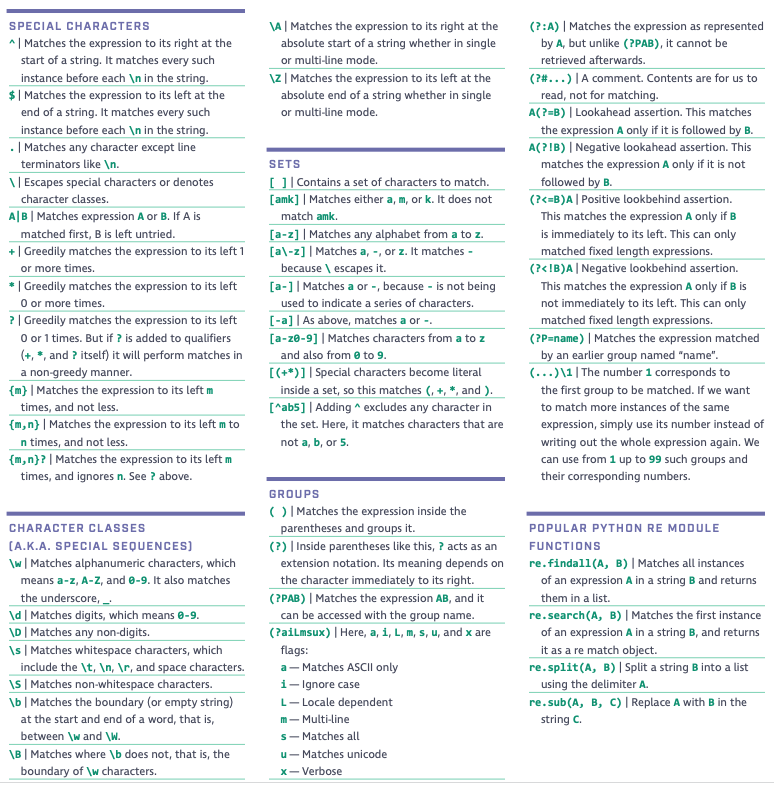

In [ ]:
#import regular expressions to clean up the text
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text) # remove all html markup ; re.sub(A, B, C) will Replace A with B in the string C.
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text) # findall the emoticons re.findall(A, B) | Matches all instances of an expression A in a string B and returns them in a list.
    
    # remove the non-word chars '[\W]+'
    # append the emoticons to end 
    # convert all to lowercase
    # remove nose char for consistency
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', '')) 
    return text

In [ ]:
review_num = 5635 #3635
print("before \n")
df.loc[review_num, 'review']

before 



'I really thought this would be a good movie, boy...was I mistaken! For a quick summery: B grade acting C grade special effects D grade for the overall movie. Don\'t get me wrong, the story was pretty good and not kiddish so an adult too ride along with it, the "hero" is good looking so most women will like it :-), not a total chick flick as it contains some fight scenes and some blood<br /><br />but the way it is shot... horrible <br /><br />the special effects->would be better suited for TV->on a kids show <br /><br />and lastly...send some of the actors back to acting school if they ever attended a class there.<br /><br />Trust me there are much better ways to waste 2 hours.<br /><br />You have been warned.'

In [ ]:
print("\nAfter")
preprocessor(df.loc[review_num, 'review'])#[-50:]


After


'i really thought this would be a good movie boy was i mistaken for a quick summery b grade acting c grade special effects d grade for the overall movie don t get me wrong the story was pretty good and not kiddish so an adult too ride along with it the hero is good looking so most women will like it not a total chick flick as it contains some fight scenes and some bloodbut the way it is shot horrible the special effects would be better suited for tv on a kids show and lastly send some of the actors back to acting school if they ever attended a class there trust me there are much better ways to waste 2 hours you have been warned :)'

### Apply the clean data preprocessor to the text

In [ ]:
preprocessor("</a>This :) is :( a test :-)!")

'this is a test :) :( :)'

In [ ]:
# apply the preprocessor to the entire dataframe (i.e. column review)
df['review'] = df['review'].apply(preprocessor)



In [ ]:
# check the cleaned df 
df.head(5)

,review,sentiment
0,in 1974 the teenager martha moxley maggie grac...,1
1,ok so i really like kris kristofferson and his...,0
2,spoiler do not read this if you think about w...,0
3,hi for all the people who have seen this wonde...,1
4,i recently bought the dvd forgetting just how ...,0


### Tokenise - break text into tokens

In [ ]:
def tokenizer(text):
       return text.split()


In [ ]:
print(tokenizer("Tokenise this sentence into its individual words"))

['Tokenise', 'this', 'sentence', 'into', 'its', 'individual', 'words']


### Stopwords - Removing stopwords from text
We need to down load the stopwords list from nltk.
You can do that as follows:


In [ ]:
from nltk.corpus import stopwords 

nltk.download('stopwords')
stop = set(stopwords.words('english'))
print("Number of stopwords:", len(stop))

Number of stopwords: 179


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Create a method to accept a piece of tokenised text and return text back without the stopped words

In [ ]:
def stop_removal(text):
       return [w for w in text if not w in stop]

In [ ]:
text = "This is a sample sentence, demonstrating the removal of stop words."
stopped_text = stop_removal(tokenizer(text))
print(stopped_text) 

['This', 'sample', 'sentence,', 'demonstrating', 'removal', 'stop', 'words.']


### Stemming - Processing tokens into their root form
For this purpose we will explore two different stemmers and select one.

In [ ]:
from nltk.stem.snowball import SnowballStemmer

#See which languages are supported.
print(" ".join(SnowballStemmer.languages))

arabic danish dutch english finnish french german hungarian italian norwegian porter portuguese romanian russian spanish swedish


In [ ]:
#get the english stemmer
stemmer = SnowballStemmer("english")

#stem a word
print(stemmer.stem("progamming"))

progam


In [ ]:
#The 'english' stemmer is better than the original 'porter' stemmer.
print(SnowballStemmer("english").stem("generously"))

print(SnowballStemmer("porter").stem("generously"))

generous
gener


In [ ]:
#Decide not to stem stopwords with ignore_stopwords
stemmer2 = SnowballStemmer("english", ignore_stopwords=True)

#compare the two versions of the stemmer
print(stemmer.stem("having"))

print(stemmer2.stem("having"))

have
having


### Tokenise + Stemming 
Lets create  a method to stem each word / token contained in the piece of text. 
The text is first tokenised before stemming.

In [ ]:
def tokenizer_stemmer(text):
    return [stemmer.stem(word) for word in tokenizer(text)]

In [ ]:
tokenizer('runners like running and thus they run')

['runners', 'like', 'running', 'and', 'thus', 'they', 'run']

In [ ]:
tokenizer_stemmer('runners like running and thus they run')

['runner', 'like', 'run', 'and', 'thus', 'they', 'run']

You can clearly see from the code above the effect of the stemmer on the tokens

In [ ]:
# suppose we want to return tokens that are stemmed and are not stop words
# using the above tokenizer_stemmer and the stop list
# SOLUTION here
[w for w in tokenizer_stemmer('A runner likes running and runs a lot') if w.lower() not in stop]


['runner', 'like', 'run', 'run', 'lot']

### <font color='red'>Exercise</font>: method to preprocess text (tokenise, stopword removal and stemming)
Write a method that takes a sentence and preprocesses it by first tokenising then removing stop words and finally stemming, beore returing the text.






In [ ]:
#SOLUTION here
stop = set(stopwords.words('english'))

def tokenizer_stop_stemmer(text):
    result = []
    for word in tokenizer(text.lower()): #tokenise
        if not word.lower() in stop: #remove stops
            result.append(stemmer.stem(word)) #stem
    return result


#####
def tokenizer_stop_stemmer2(text):
    result = []

    pre_stop = preprocessed_stop(text) # stopwords are being stemmed for comparison

    #B = list(set(pre_stop)-set(stop))
    #print(B)

    for word in tokenizer(text.lower()): #tokenise
        if not (stemmer.stem(word)) in preprocessed_stop(text): #remove stops
            result.append(stemmer.stem(word)) #stem
    return result

def preprocessed_stop(text):
    return [stemmer.stem(word) for word in stop]

In [ ]:
print(tokenizer_stop_stemmer('M runner likes running and having rides a lot'))
print(tokenizer_stop_stemmer2('M runner likes running and having rides a lot'))

['runner', 'like', 'run', 'ride', 'lot']
['runner', 'like', 'run', 'ride', 'lot']


## Get the Training and Testing splits

In [ ]:
#get a small sample from the 50K data
small_df= df.sample(frac=0.01, replace=False, random_state=1)
#Strip HTML and punctuation to speed up text processing
small_df['review'] = small_df['review'].apply(preprocessor)

#get the X and y parts of data
X = small_df.loc[:, 'review'].values
y = small_df.loc[:, 'sentiment'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                          random_state=42,
                                                          test_size=0.30, # lets use 30% for testing
                                                          stratify=y)
print("Sample of Training data:", X_train.shape)
print("Sample of Test data:", X_test.shape)

Sample of Training data: (350,)
Sample of Test data: (150,)


### Analyse the imdb frequency distribution

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


200


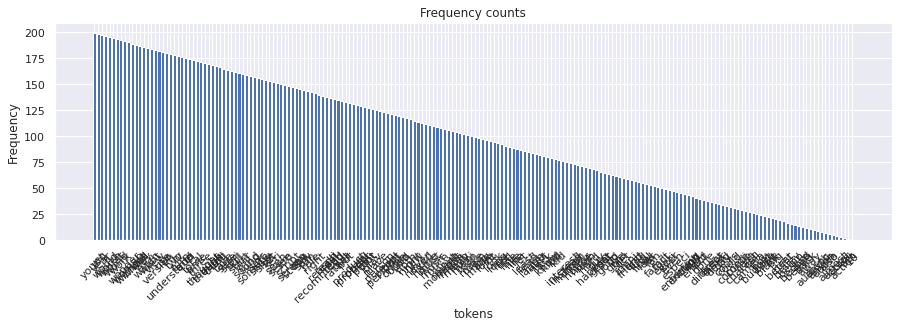

In [ ]:
#Plot a frequency plot for some of our reviews after being stopped and stemmed
cleaned_X_train = np.asarray([tokenizer_stop_stemmer(doc) for doc in X_train])


# in order to use the previous plot we need to ensure each review is a string (not in a list)
new_str = [  ' '.join(x)  for x in cleaned_X_train ]

get_frequency_distribution(new_str, 200, 0.5,10) #(docs, max_features max_df, min_df)

## Training a model for sentiment classification
### <font color='red'>Exercise</font>:
* First create a basic classiffier (e.g.  LogisticRegression(solver='lbfgs')) using the Tfidf vectoriser of the text data. 
* Thereafter we can setup a simple pipeline and 
* Finally setup a comparative study with grid search. 

In [ ]:
# prepare text data for training the model
vectorizer_imdb = TfidfVectorizer(max_features=500)
vectorizer_imdb.fit(X) # Learn a vocabulary dictionary of all tokens in the raw documents.

X_train_vec0 = vectorizer_imdb.transform(X_train)# transform to features for the classifier
X_test_vec0 = vectorizer_imdb.transform(X_test)
print("Sample of Training data:", X_train_vec0.shape)
print("Sample of Test data:", X_test_vec0.shape)

# SOLUTION here 
clf = LogisticRegression(solver='lbfgs')
print(clf)

clf.fit(X_train_vec0, y_train)
# Training accuracy
print("Train Accuracy :", clf.score(X_train_vec0, y_train))
# Test Accuracy
print("Test Accuracy :", clf.score(X_test_vec0, y_test))

Sample of Training data: (350, 500)
Sample of Test data: (150, 500)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Train Accuracy : 0.9285714285714286
Test Accuracy : 0.74


### Setting up a simple pipline
In the above example we used the tfidf vectoriser to transform both the train and test data before fitting a classifier for prediction. 
This pipeline of transformation steps and the final prediction can be carried out by setting up a pipeline.

Instead of using the transformed vectors of X_train and Y_train ; we can use the original train and test which contained the text data i.e. X_train and X_test. 
These can then be sent through the transformation pipeline steps. 

In [ ]:
pipeline = make_pipeline(

                        TfidfVectorizer(),
                        LogisticRegression(random_state=1, solver='lbfgs')
                        )

# SOLUTION here fit, predict and show the classification report
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print('accuracy %s' % pipeline.score(X_test, y_test))


# print(classification_report(y_test, y_pred, target_names=[k for k, v in class_mapping.items()]))
print(classification_report(y_test, y_pred, target_names=imdb_class_labels))

accuracy 0.7333333333333333
              precision    recall  f1-score   support

      review       0.71      0.80      0.75        76
   sentiment       0.77      0.66      0.71        74

    accuracy                           0.73       150
   macro avg       0.74      0.73      0.73       150
weighted avg       0.74      0.73      0.73       150



### Setting up grid search
In the previous cell we calculated results based on a single test-train split. 
Ideally we want to do this using cross-validation. For this purpose we can use GridSearchCV.
Details of the many possible TfidfVectorizer parameters (see the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)). 

In [ ]:
param_grid0 = [{
    'clf__solver': [('lbfgs'), ('liblinear')],
    'vect__ngram_range': [(1,1)], #can also extract 2-grams of words in addition to the 1-grams (individual words)
    'vect__tokenizer': [tokenizer_stemmer], # use a tokeniser and the stemmer 
    'vect__stop_words': [stop] # use the stop dictionary of stopwords or not
              }]

#Sentiment classification with a neural net
pipe_tfidf = Pipeline([
                  ('vect', TfidfVectorizer()),
                  ('clf', LogisticRegression())
                  ]) 
                
gs_sentiment_classification = GridSearchCV(pipe_tfidf, param_grid0,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=1) 

#### <font color='red'>Warning</font>
**Important Note about the running time**

Executing the following code cell **may take up to 30-60 min** depending on your machine, since based on the parameter grid we defined, there are many models to fit.

If you do not wish to wait so long, you could reduce the size of the dataset by decreasing the number of training samples, for example, as follows:

    X_train = df.loc[:2500, 'review'].values
    y_train = df.loc[:2500, 'sentiment'].values
    
However, note that decreasing the training set size to such a small number will likely result in poorly performing models. Alternatively, you can delete parameters from the grid above to reduce the number of models to fit -- for example, by using the following:

    param_grid = [{'vect__ngram_range': [(1, 1)],
                   'vect__stop_words': [stop, None],
                   'vect__tokenizer': [tokenizer],
                  ]

In [ ]:
gs_sentiment_classification.fit(X_train, y_train) # Tfidf vectoriser will transform so send the X_train not the vectors

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', "should'v", 'themselv', 'veri', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', "should'v", 'themselv', 'veri', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inco

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [ ]:
print('Best parameter set: %s ' % gs_sentiment_classification.best_params_)
print('CV Accuracy: %.3f' % gs_sentiment_classification.best_score_)


Best parameter set: {'clf__solver': 'lbfgs', 'vect__ngram_range': (1, 1), 'vect__stop_words': {'by', 'before', 'll', 'its', 'm', 'a', 'won', "don't", 'over', 'from', 'did', "you're", 'ain', 'of', 'herself', 'don', 'whom', 'they', 'down', 'through', 'y', 'just', "didn't", "shouldn't", "you've", 'wasn', 'in', 'her', 'been', 'as', 'itself', 'this', 't', 'mustn', 'and', "isn't", 'hers', 'themselves', 'i', 'ourselves', "she's", 'will', 'she', 'not', 'my', 'has', 'any', 'such', 'too', 'me', "that'll", 'until', 'himself', 'where', 'that', 'them', 'having', 'above', 'more', 'these', 'do', 'yours', 'while', 'shan', "wasn't", 'had', 'shouldn', 'then', 'no', 'own', 's', 'very', 'our', 'into', 'to', 'once', 'wouldn', 'are', 'haven', 'up', "you'd", 'weren', 'now', 'their', 'if', 'is', 'you', 'both', 'each', 'being', 'should', 'after', 'ma', 'at', 'the', 'be', 're', 'which', 'most', 'other', "you'll", 'mightn', 'about', 'there', 'so', 'for', 'does', 'o', 'doesn', 'same', 'needn', 'we', "doesn't", 'h

In [ ]:
clf = gs_sentiment_classification.best_estimator_
print('Test Accuracy: %.3f' % clf.score(X_test, y_test))

Test Accuracy: 0.747


####  GridSearchCV versus cross_val_score
    
Please note that **best_score_** is the average k-fold cross-validation score. I.e., if we have a `GridSearchCV` object with 5-fold cross-validation (like the one above), the `best_score_` attribute returns the average score over the 5-folds of the best model. 
In contrast cross_val_score will return the individual preformance values for each fold. 

In [ ]:
cross_val_score(gs_sentiment_classification, X_train, y_train, cv=5)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', "should'v", 'themselv', 'veri', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', "should'v", 'themselv', 'veri', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inco

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', "should'v", 'themselv', 'veri', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', "should'v", 'themselv', 'veri', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inco

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', "should'v", 'themselv', 'veri', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', "should'v", 'themselv', 'veri', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inco

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', "should'v", 'themselv', 'veri', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', "should'v", 'themselv', 'veri', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inco

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', "should'v", 'themselv', 'veri', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', "should'v", 'themselv', 'veri', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inco

array([0.77, 0.8 , 0.86, 0.81, 0.8 ])

## <font color='red'>Exercise</font>: Exploring text classifier alternatives with grid search
In the previous code you saw that having the stopword remover (i.e. stop ) was better than None (not having stopword removal). You can now explore other alternatives. Change the param_grid0  values to explore the following:
1.  Does having Tokenizer_stemmer result in better accuracy compared to just the tokenizer (with no stemmer)?
2. What happens if you consider both unigrams and bigrams? Is there a benfit to analysing bigrams?
3. Include comparisons for different tfidf parameter values such as min_df, max_df, mac_features
4. How can you modify the classifier 'clf' to a different learner such as the MLPClassifier  - MLPClassifier(activation='relu', solver='adam', max_iter=2000, hidden_layer_sizes=(100,)) ; 
or any of the learners you have tried in the previous lab ; e.g. SVC(kernel='linear', gamma=0.7, C=1.0).

In [ ]:
#SOLUTION 1 stemmer versus no stemmer
param_grid1 = [{

    'vect__ngram_range': [(1,1),(1,2)], #can also extract 2-grams of words in addition to the 1-grams (individual words)
    'vect__tokenizer': [tokenizer, tokenizer_stemmer], # to use a stemmer or not 
    'vect__stop_words': [stop] # use the stop dictionary of stopwords or not
                }]

#Sentiment classification 
pipe_tfidf = Pipeline([
                  ('vect', TfidfVectorizer()),
                  ('cls', SVC(kernel='linear', gamma=0.7, C=1.0)) # SVM classifier
                  ]) 
                  
gs_sentiment_classification1 = GridSearchCV(pipe_tfidf, param_grid1,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=1) 

gs_sentiment_classification1.fit(X_train, y_train)
print('Best parameter set: %s ' % gs_sentiment_classification1.best_params_)
print('CV Accuracy: %.3f' % gs_sentiment_classification1.best_score_)

clf1 = gs_sentiment_classification1.best_estimator_
print('Test Accuracy: %.3f' % clf1.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', "should'v", 'themselv', 'veri', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', "should'v", 'themselv', 'veri', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inco

Best parameter set: {'vect__ngram_range': (1, 2), 'vect__stop_words': {'by', 'before', 'll', 'its', 'm', 'a', 'won', "don't", 'over', 'from', 'did', "you're", 'ain', 'of', 'herself', 'don', 'whom', 'they', 'down', 'through', 'y', 'just', "didn't", "shouldn't", "you've", 'wasn', 'in', 'her', 'been', 'as', 'itself', 'this', 't', 'mustn', 'and', "isn't", 'hers', 'themselves', 'i', 'ourselves', "she's", 'will', 'she', 'not', 'my', 'has', 'any', 'such', 'too', 'me', "that'll", 'until', 'himself', 'where', 'that', 'them', 'having', 'above', 'more', 'these', 'do', 'yours', 'while', 'shan', "wasn't", 'had', 'shouldn', 'then', 'no', 'own', 's', 'very', 'our', 'into', 'to', 'once', 'wouldn', 'are', 'haven', 'up', "you'd", 'weren', 'now', 'their', 'if', 'is', 'you', 'both', 'each', 'being', 'should', 'after', 'ma', 'at', 'the', 'be', 're', 'which', 'most', 'other', "you'll", 'mightn', 'about', 'there', 'so', 'for', 'does', 'o', 'doesn', 'same', 'needn', 'we', "doesn't", 'he', "needn't", 'couldn',

In [ ]:
 #SOLUTION 2 unigram versus bigram
param_grid2 = [{
    'clf__hidden_layer_sizes': [(50),(100)],
    'vect__ngram_range': [(1,2)], #can also extract 2-grams of words in addition to the 1-grams (individual words)

    'vect__tokenizer': [tokenizer_stemmer], # use a tokeniser and the stemmer 
    'vect__stop_words': [stop], # use the stop dictionary of stopwords or not
    }]

#Sentiment classification with a neural net
pipe_tfidf = Pipeline([
                  ('vect', TfidfVectorizer()),
                  ('clf',  MLPClassifier(max_iter=2048))
                  ]) 
                  
gs_sentiment_classification2 = GridSearchCV(pipe_tfidf, param_grid2,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=1) 

gs_sentiment_classification2.fit(X_train, y_train)
print('Best parameter set: %s ' % gs_sentiment_classification2.best_params_)
print('CV Accuracy: %.3f' % gs_sentiment_classification2.best_score_)

clf2 = gs_sentiment_classification2.best_estimator_
print('Test Accuracy: %.3f' % clf2.score(X_test, y_test))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', "should'v", 'themselv', 'veri', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', "should'v", 'themselv', 'veri', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inco

Best parameter set: {'clf__hidden_layer_sizes': 100, 'vect__ngram_range': (1, 2), 'vect__stop_words': {'by', 'before', 'll', 'its', 'm', 'a', 'won', "don't", 'over', 'from', 'did', "you're", 'ain', 'of', 'herself', 'don', 'whom', 'they', 'down', 'through', 'y', 'just', "didn't", "shouldn't", "you've", 'wasn', 'in', 'her', 'been', 'as', 'itself', 'this', 't', 'mustn', 'and', "isn't", 'hers', 'themselves', 'i', 'ourselves', "she's", 'will', 'she', 'not', 'my', 'has', 'any', 'such', 'too', 'me', "that'll", 'until', 'himself', 'where', 'that', 'them', 'having', 'above', 'more', 'these', 'do', 'yours', 'while', 'shan', "wasn't", 'had', 'shouldn', 'then', 'no', 'own', 's', 'very', 'our', 'into', 'to', 'once', 'wouldn', 'are', 'haven', 'up', "you'd", 'weren', 'now', 'their', 'if', 'is', 'you', 'both', 'each', 'being', 'should', 'after', 'ma', 'at', 'the', 'be', 're', 'which', 'most', 'other', "you'll", 'mightn', 'about', 'there', 'so', 'for', 'does', 'o', 'doesn', 'same', 'needn', 'we', "does

In [ ]:
#SOLUTION 3 compairing Tfidf parameters
param_grid3 = [{
    'cls__kernel':[('linear'), ('rbf')],
    'vect__ngram_range': [(1,2)], #can also extract 2-grams of words in addition to the 1-grams (individual words)
    'vect__max_features': (500, 1000, None), # a vocabulary that only consider the top max_features ordered by term frequency
    'vect__min_df': (7, 10), # ignore terms that have a document frequency strictly lower than )
    'vect__max_df': (0.75, 0.95), #ignore terms that have a document frequency strictly higher 
    'vect__tokenizer': [tokenizer_stemmer], # use a tokeniser and the stemmer 
    'vect__stop_words': [stop] # use the stop dictionary of stopwords or not
                 }]

#Sentiment classification
pipe_tfidf = Pipeline([
                  ('vect', TfidfVectorizer()),
                  ('cls', SVC(gamma=0.7, C=1.0)) # SVM classifier
                  ]) 
                  
gs_sentiment_classification3 = GridSearchCV(pipe_tfidf, param_grid3,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=1) 

gs_sentiment_classification3.fit(X_train, y_train)
print('Best parameter set: %s ' % gs_sentiment_classification3.best_params_)
print('CV Accuracy: %.3f' % gs_sentiment_classification3.best_score_)

clf3 = gs_sentiment_classification3.best_estimator_
print('Test Accuracy: %.3f' % clf3.score(X_test, y_test))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', "should'v", 'themselv', 'veri', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', "should'v", 'themselv', 'veri', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inco

Best parameter set: {'cls__kernel': 'rbf', 'vect__max_df': 0.75, 'vect__max_features': 1000, 'vect__min_df': 7, 'vect__ngram_range': (1, 2), 'vect__stop_words': {'by', 'before', 'll', 'its', 'm', 'a', 'won', "don't", 'over', 'from', 'did', "you're", 'ain', 'of', 'herself', 'don', 'whom', 'they', 'down', 'through', 'y', 'just', "didn't", "shouldn't", "you've", 'wasn', 'in', 'her', 'been', 'as', 'itself', 'this', 't', 'mustn', 'and', "isn't", 'hers', 'themselves', 'i', 'ourselves', "she's", 'will', 'she', 'not', 'my', 'has', 'any', 'such', 'too', 'me', "that'll", 'until', 'himself', 'where', 'that', 'them', 'having', 'above', 'more', 'these', 'do', 'yours', 'while', 'shan', "wasn't", 'had', 'shouldn', 'then', 'no', 'own', 's', 'very', 'our', 'into', 'to', 'once', 'wouldn', 'are', 'haven', 'up', "you'd", 'weren', 'now', 'their', 'if', 'is', 'you', 'both', 'each', 'being', 'should', 'after', 'ma', 'at', 'the', 'be', 're', 'which', 'most', 'other', "you'll", 'mightn', 'about', 'there', 'so'

In [ ]:
# SOLUTION 4 with Naive bayes classiffier 
param_grid4 = [{
    'vect__max_features': [(1000)], # a vocabulary that only consider the top max_features ordered by term frequency
    'vect__min_df': [(7)], # ignore terms that have a document frequency strictly lower than )
    'vect__max_df': [(0.75)], #ignore terms that have a document frequency strictly higher 
    'vect__ngram_range': [(1,2)], #can also extract 2-grams of words in addition to the 1-grams (individual words)               
    'vect__tokenizer': [tokenizer_stemmer], # use a tokeniser and the stemmer 
    'vect__stop_words': [stop] # use the stop dictionary of stopwords or not
             }]

#Sentiment classification with a NB
pipe_tfidf = Pipeline([
                  ('vect', TfidfVectorizer()),
                  ('clf',  MultinomialNB(alpha=1.0, class_prior=None)) # naive bayes with default settings
                  ]) 
                  
gs_sentiment_classification4 = GridSearchCV(pipe_tfidf, param_grid4,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=1) 

gs_sentiment_classification4.fit(X_train, y_train)
print('Best parameter set: %s ' % gs_sentiment_classification4.best_params_)
print('CV Accuracy: %.3f' % gs_sentiment_classification4.best_score_)

clf4 = gs_sentiment_classification4.best_estimator_
print('Test Accuracy: %.3f' % clf4.score(X_test, y_test))


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', "should'v", 'themselv', 'veri', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'onli', 'ourselv', "should'v", 'themselv', 'veri', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inco

Best parameter set: {'vect__max_df': 0.75, 'vect__max_features': 1000, 'vect__min_df': 7, 'vect__ngram_range': (1, 2), 'vect__stop_words': {'by', 'before', 'll', 'its', 'm', 'a', 'won', "don't", 'over', 'from', 'did', "you're", 'ain', 'of', 'herself', 'don', 'whom', 'they', 'down', 'through', 'y', 'just', "didn't", "shouldn't", "you've", 'wasn', 'in', 'her', 'been', 'as', 'itself', 'this', 't', 'mustn', 'and', "isn't", 'hers', 'themselves', 'i', 'ourselves', "she's", 'will', 'she', 'not', 'my', 'has', 'any', 'such', 'too', 'me', "that'll", 'until', 'himself', 'where', 'that', 'them', 'having', 'above', 'more', 'these', 'do', 'yours', 'while', 'shan', "wasn't", 'had', 'shouldn', 'then', 'no', 'own', 's', 'very', 'our', 'into', 'to', 'once', 'wouldn', 'are', 'haven', 'up', "you'd", 'weren', 'now', 'their', 'if', 'is', 'you', 'both', 'each', 'being', 'should', 'after', 'ma', 'at', 'the', 'be', 're', 'which', 'most', 'other', "you'll", 'mightn', 'about', 'there', 'so', 'for', 'does', 'o', 

# 3.0 Text Classification Case Studies 


## <font color='red'>Exercise</font>: SMS Spam filter as a classification task
We first load the text data  "SMSSpamCollection"

Furthermore, we perform some simple preprocessing and split the data array into two parts:

1. `text`: A list of lists, where each sublists contains the contents of our emails
2. `y`: our SPAM vs HAM labels stored in binary; a 1 represents a spam message, and a 0 represnts a ham (non-spam) message. 
1. Use the Tfidf vectoriser to transofrm the email content. 
2. Setup a gridsearch with pipelines to identify a good model for SMS message classification

NOTE: the class labels column is categorical. This means that we need a class mapping. 

In [ ]:
sms_filename = "https://raw.githubusercontent.com/nirmalie/CM4107/main/SMSSpamData.csv"
df_sms = pd.read_csv(sms_filename) 

In [ ]:
print("length of the dataset:", len(df_sms))
df_sms.head(10)

length of the dataset: 5574


,class,sms_msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
#SOLUTION
# Get the classes mapped to 0 and 1
class_labels = (np.unique(df_sms['class'])) # get the unique class labels
print("Mapping class labels:", class_labels)
sms_class_mapping = {label:idx for idx,label in enumerate(class_labels)}

sms_class_labels = [x for x in sms_class_mapping] # store the class labels for later

df_sms["class"] = df_sms["class"].map(sms_class_mapping)
df_sms.head(3)

Mapping class labels: ['ham' 'spam']


,class,sms_msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [ ]:
# SOLUTION
# get the data
X = df_sms.loc[:, 'sms_msg'].values
y = df_sms.loc[:, 'class'].values
text_train, text_test, y_train, y_test = train_test_split(X, y, 
                                                          random_state=42,
                                                          test_size=0.30, # lets use 30% for testing
                                                          stratify=y)

small_df= df_sms.sample(frac=0.4, replace=False, random_state=1)

#preprocessing step needed
small_df['sms_msg'] = small_df['sms_msg'].apply(preprocessor) #remove html tags and regular expressions
# form X and y
X = small_df.loc[:, 'sms_msg'].values
y = small_df.loc[:, 'class'].values
# get the split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                          random_state=42,
                                                          test_size=0.30, # lets use 30% for testing
                                                          stratify=y)
print("Sample of Training data:", X_train.shape)
print("Sample of Test data:", X_test.shape)



Sample of Training data: (1561,)
Sample of Test data: (669,)


In [ ]:
# SOLUTION
# set the pipelines and grid search
param_grid_sms = [{
    'vect__ngram_range': [(1,2)], #can also extract 2-grams of words in addition to the 1-grams (individual words)
    'vect__tokenizer': [tokenizer_stemmer], # use a tokeniser and the stemmer 
    'vect__max_features': [1000, 4000], # set the vocabulary size'
    'vect__stop_words': [None] # use the stop dictionary of stopwords or not
              }]

#Sentiment classification with a neural net
pipe_tfidf_sms = Pipeline([
                  ('vect', TfidfVectorizer( min_df=7)),      
                  ('cls', SVC(kernel='rbf', gamma=0.7, C=1.0)) # SVM classifier
                  ]) 
                
gs_sms_classification = GridSearchCV(pipe_tfidf_sms, param_grid_sms,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=1) 

In [ ]:
# SOLUTION use cross validation to carryout the grid search
gs_sms_classification.fit(X_train, y_train) 
print('Best parameter set: %s ' % gs_sms_classification.best_params_)
print('CV Accuracy: %.3f' % gs_sms_classification.best_score_)
clf = gs_sms_classification.best_estimator_

#use the test data to evaluate
print('Test Accuracy: %.3f' % clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=class_labels))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.2s finished


Best parameter set: {'vect__max_features': 1000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer_stemmer at 0x7fb6ef7045f0>} 
CV Accuracy: 0.977
Test Accuracy: 0.988
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       581
        spam       1.00      0.91      0.95        88

    accuracy                           0.99       669
   macro avg       0.99      0.95      0.97       669
weighted avg       0.99      0.99      0.99       669



## <font color='red'>Exercise</font>: Carry out text classification on the Newsgroup dataset
The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.
You can find out more about the dataset from here [(https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html)]

Build a text classifier for this dataset by following these steps:
1.   Load the data an examine structure 
2.   Set the pipelines
3.   Specify the grid search
4.   Analyse the results



In [ ]:
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint

# please refer to sklearn documentation about the full dataset
# here we will work on a small sample of categories instead of the 20 categories
cats = ['sci.crypt','sci.electronics','sci.med','sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats)
newsgroups_test = fetch_20newsgroups(subset='test', categories=cats)

pprint(list(newsgroups_train.target_names))
news_class_labels = list(newsgroups_train.target_names)

['sci.crypt', 'sci.electronics', 'sci.med', 'sci.space']


In [ ]:
train_data= pd.Series(newsgroups_train.data) 


train_df=pd.DataFrame(train_data) 
train_df.columns = ['Data'] + train_df.columns.tolist()[1:] 
train_df['target'] = pd.Series(newsgroups_train.target)
print("Size of the corpus:", len(train_df))
train_df.head(8)

Size of the corpus: 2373


,Data,target
0,From: al@escom.com (Al Donaldson)\nSubject: Re...,0
1,From: harpe@netnews.louisville.edu (Mike Harpe...,1
2,From: henry@zoo.toronto.edu (Henry Spencer)\nS...,3
3,From: geva@concave.cs.wits.ac.za (Geva Patz)\n...,1
4,From: rdl1@ukc.ac.uk (R.D.Lorenz)\nSubject: Co...,3
5,From: redsonja@olias.linet.org (Red Sonja)\nSu...,0
6,From: ron.roth@rose.com (ron roth)\nSubject: S...,2
7,From: alung@megatest.com (Aaron Lung)\nSubject...,1


In [ ]:
# get the test data
test_data= pd.Series(newsgroups_test.data) 

test_df=pd.DataFrame(test_data) 
test_df.columns = ['Data'] + test_df.columns.tolist()[1:] # add the 'target' to the list of columns
test_df['target'] = pd.Series(newsgroups_test.target)

#Strip HTML and punctuation to speed up text processing
test_df['Data'] = test_df['Data'].apply(preprocessor)

print("Size of the test data:", len(test_df))
test_df.head(8)

Size of the test data: 1579


,Data,target
0,from rousself cicb fr frank roussel subject ft...,3
1,from mccall mksol dseg ti com fred j mccall 57...,3
2,from mavmav mksol dseg ti com michael a vincze...,2
3,from david stat com david dodell subject hicn6...,2
4,from mkrajci wilkes1 wilkes edu martin k subje...,1
5,from uabdpo dpo uab edu gila005 stephen hollan...,2
6,from levin bbn com joel b levin subject re doe...,0
7,from cme ellisun sw stratus com carl ellison s...,0


In [ ]:
#get a small sample from the 50K data
small_df= train_df.sample(frac=0.5, replace=False, random_state=1)

#Strip HTML and punctuation to speed up text processing
small_df['Data'] = small_df['Data'].apply(preprocessor)

X_train = small_df.loc[:, 'Data'].values
y_train = small_df.loc[:, 'target'].values


print("Sample of Training data:", X_train.shape)


#Test data
X_test = test_df.loc[:, 'Data'].values
y_test = test_df.loc[:, 'target'].values
print("Test data:", X_test.shape)

Sample of Training data: (1186,)
Test data: (1579,)


In [ ]:
news_param_grid = [{

    'vect__ngram_range': [(1,2)], #can also extract 2-grams of words in addition to the 1-grams (individual words)
    'vect__tokenizer': [tokenizer], # to use a stemmer or not 
    'vect__stop_words': [stop] # use the stop dictionary of stopwords or not
                }]

#News group classification 
news_pipe_tfidf = Pipeline([
                  ('vect', TfidfVectorizer()),
                  ('cls', SVC(kernel='rbf', gamma=0.7, C=1.0)) 
                  ]) 
                  
gs_news_classification = GridSearchCV(news_pipe_tfidf, news_param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=1) 

gs_news_classification.fit(X_train, y_train)
print('Best parameter set: %s ' % gs_news_classification.best_params_)
print('CV Accuracy: %.3f' % gs_news_classification.best_score_)

news_clf = gs_news_classification.best_estimator_
print('Test Accuracy: %.3f' % news_clf.score(X_test, y_test))

# detailed report on test data
y_pred = news_clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=news_class_labels))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   18.6s finished


Best parameter set: {'vect__ngram_range': (1, 2), 'vect__stop_words': {'by', 'before', 'll', 'its', 'm', 'a', 'won', "don't", 'over', 'from', 'did', "you're", 'ain', 'of', 'herself', 'don', 'whom', 'they', 'down', 'through', 'y', 'just', "didn't", "shouldn't", "you've", 'wasn', 'in', 'her', 'been', 'as', 'itself', 'this', 't', 'mustn', 'and', "isn't", 'hers', 'themselves', 'i', 'ourselves', "she's", 'will', 'she', 'not', 'my', 'has', 'any', 'such', 'too', 'me', "that'll", 'until', 'himself', 'where', 'that', 'them', 'having', 'above', 'more', 'these', 'do', 'yours', 'while', 'shan', "wasn't", 'had', 'shouldn', 'then', 'no', 'own', 's', 'very', 'our', 'into', 'to', 'once', 'wouldn', 'are', 'haven', 'up', "you'd", 'weren', 'now', 'their', 'if', 'is', 'you', 'both', 'each', 'being', 'should', 'after', 'ma', 'at', 'the', 'be', 're', 'which', 'most', 'other', "you'll", 'mightn', 'about', 'there', 'so', 'for', 'does', 'o', 'doesn', 'same', 'needn', 'we', "doesn't", 'he', "needn't", 'couldn',

# MISC

In [ ]:
!wget 'http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip'
!unzip trainingandtestdata.zip

--2021-11-08 11:03:40--  http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip
Resolving cs.stanford.edu (cs.stanford.edu)... 171.64.64.64
Connecting to cs.stanford.edu (cs.stanford.edu)|171.64.64.64|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip [following]
--2021-11-08 11:03:40--  https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip
Connecting to cs.stanford.edu (cs.stanford.edu)|171.64.64.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81363704 (78M) [application/zip]
Saving to: ‘trainingandtestdata.zip’

trainingandtestdata 100%[===================>]  77.59M  12.7MB/s    in 7.0s    

2021-11-08 11:03:47 (11.0 MB/s) - ‘trainingandtestdata.zip’ saved [81363704/81363704]

Archive:  trainingandtestdata.zip
  inflating: testdata.manual.2009.06.14.csv  
  inflating: training.1600000.processed.noemoticon.csv  


In [ ]:
csv_file_name = "training.1600000.processed.noemoticon.csv"

In [ ]:
df_senti140 = pd.read_csv(csv_file_name,  encoding='latin-1') 
df_senti140 = pd.read_csv(csv_file_name,  encoding='latin-1', usecols=[0,5], names=['class', 'review'], header=None)

In [ ]:
df_senti140.head(5)

,class,review
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# Get the classes mapped to 0 and 1
class_labels = (np.unique(df_senti140['class'])) # get the unique class labels
print("Mapping class labels:", class_labels)
s140_class_mapping = {label:idx for idx,label in enumerate(class_labels)}

s140_class_labels = [x for x in s140_class_mapping] # store the class labels for later

df_senti140["class"] = df_senti140["class"].map(s140_class_mapping)
df_senti140.head(-3)

Mapping class labels: [0 1]


,class,review
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599992,1,ReCoVeRiNg FrOm ThE lOnG wEeKeNd
1599993,1,@SCOOBY_GRITBOYS
1599994,1,"@Cliff_Forster Yeah, that does work better tha..."
1599995,1,Just woke up. Having no school is the best fee...
